<a href="https://colab.research.google.com/github/mksnew111/Online-Retail-Customer-Segmentation/blob/main/Unsupervised_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Customer segmentation is a vital strategy in business and marketing that involves dividing a broad customer base into distinct groups of individuals who have similar characteristics or behaviors.customer segmentation allows businesses to understand their customers better, cater to their needs more effectively, and optimize various aspects of their operations. This leads to improved marketing efficiency, customer satisfaction, and overall business performance.

# **GitHub Link -**

https://github.com/mksnew111/Online-Retail-Customer-Segmentation/blob/main/Unsupervised_ML_Submission_Template.ipynb

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd       # Library for data analysis
import numpy as np          # Basic mathematic operation

import matplotlib.pyplot as plt     # Library for visualization
import matplotlib.cm as cm            # Tool for enhancing data visualizations through effective use of color
import seaborn as sns             # High level interface for drawing a informative staticals graph.
%matplotlib inline
import missingno as msno          # Library for visualize the missing Data.

from datetime import datetime     # For Handling Datatime data
import datetime as dt
from numpy import math

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler   # Standardize features in dataset.
from sklearn.cluster import KMeans            # Importing kMeans ML model
from sklearn.cluster import DBSCAN            # Importing Dbscan ML model
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')


<ipython-input-1-7030b4ed9bde>:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df = pd.read_excel("/content/drive/MyDrive/Dataset/Online Retail.xlsx")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
# last Five rows
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f" Number of Rows: {df.shape[0]} ")
print(f"Number of columns: {df.shape[1]}")

 Number of Rows: 541909 
Number of columns: 8


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5268 rows x 8 columns]

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

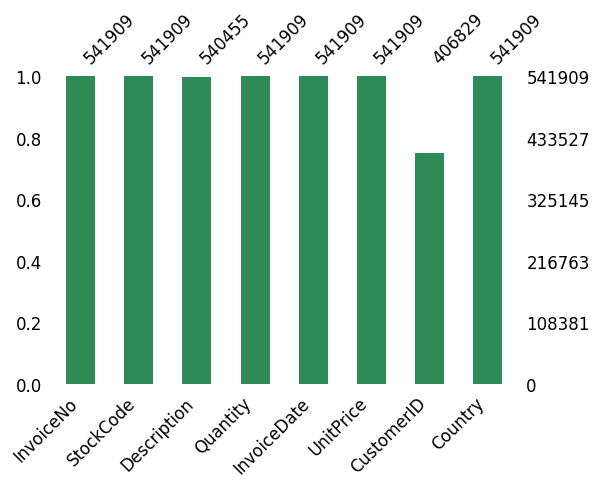

In [ ]:
# Visualizing the missing values
msno.bar(df, figsize=(6,4),color="seagreen",fontsize=12)

### What did you know about your dataset?



*   This dataset comprises 541,909 rows and 8 columns.
*   There are 5,268 duplicate rows.
*   The columns "Description" and "customer_id" contain null values
  



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

### Variables Description

InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code— a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction.

InvoiceDate: Invoice date and time.

Unit Price: Product price per unit.

CustomerID: Customer number, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. The name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  unique = df[i].unique()
  print(f"Unique value for {i}: {unique}")
  print("--"*50)

Unique value for InvoiceNo: [536365 536366 536367 ... 581585 581586 581587]
----------------------------------------------------------------------------------------------------
Unique value for StockCode: ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
----------------------------------------------------------------------------------------------------
Unique value for Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
----------------------------------------------------------------------------------------------------
Unique value for Quantity: [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6   

## 3. ***Data Wrangling***

### Data Wrangling Code

In [7]:
# Write your code to make your dataset analysis ready.
# Droping the null values
df.dropna(inplace=True)

In [8]:
# checking null values
df.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [9]:
# changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

### Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.

In [10]:
# droping the rows which contain c
df = df[~df['InvoiceNo'].str.contains('C')]

In [11]:
# droping the duplicate values
df.drop_duplicates(inplace = True)

In [12]:
# creating new features TotalAmount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [13]:
# converting InvoiceDate column into datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')


In [14]:
# creating new column from InvoiceDate
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day']   = df['InvoiceDate'].dt.day_name()
df['Hour']  = df['InvoiceDate'].dt.hour

In [15]:
df.shape

(392732, 12)

### What all manipulations have you done and insights you found?

* I have removed the null values present in the "Description" and "Customer" columns.

* In the "InvoiceNo" column, "C" indicates a cancellation; therefore, I have removed the rows where "InvoiceNo" contains "C".

* I have also removed the duplicate values present in our dataset.

* I created a new feature, "TotalAmount," by multiplying "Quantity" and "UnitPrice."

* I have also created three new columns: "Month," "Day," and "Hour" from the "InvoiceDate" column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
### Top 10 Highest spending customer.

      CustomerID  TotalAmount
1690     14646.0    280206.02
4202     18102.0    259657.30
3729     17450.0    194390.79
3009     16446.0    168472.50
1880     14911.0    143711.17
55       12415.0    124914.53
1334     14156.0    117210.08
3772     17511.0     91062.38
2703     16029.0     80850.84
0        12346.0     77183.60


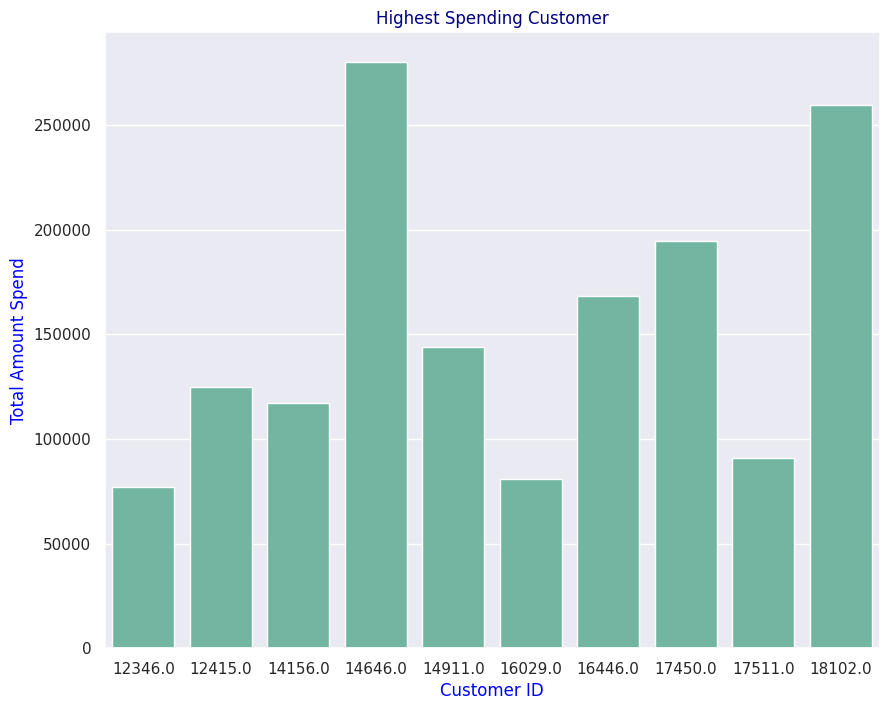

In [ ]:
# Chart - 1 visualization code
top_cust = df.groupby(['CustomerID'])['TotalAmount'].sum().reset_index()
top_10_cust = top_cust.sort_values('TotalAmount', ascending=False).head(10)
print(top_10_cust)

plt.figure(figsize=(10,8)) # Graph size
sns.set_style('darkgrid') # Style of Grpah
# Bar plot
sns.barplot(x = 'CustomerID', y = 'TotalAmount', data = top_10_cust)
#Title of Graph
plt.title("Highest Spending Customer",color='navy')
# Labels of Graph
plt.xlabel("Customer ID",color = 'blue')
plt.ylabel("Total Amount Spend",color='blue')
# Showing Graph
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are great for comparing different categories.

##### 2. What is/are the insight(s) found from the chart?

* The top spenders are revealed in this graph, with the ten highest-value customers identified.
* customer ID 14646 and 18102 spend most.

#### Chart - 2
### Top 10 Product by Unit Counts

                          Description  count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390
5             LUNCH BAG RED RETROSPOT   1303
6   SET OF 3 CAKE TINS PANTRY DESIGN    1152
7                             POSTAGE   1099
8             LUNCH BAG  BLACK SKULL.   1078
9     PACK OF 72 RETROSPOT CAKE CASES   1050


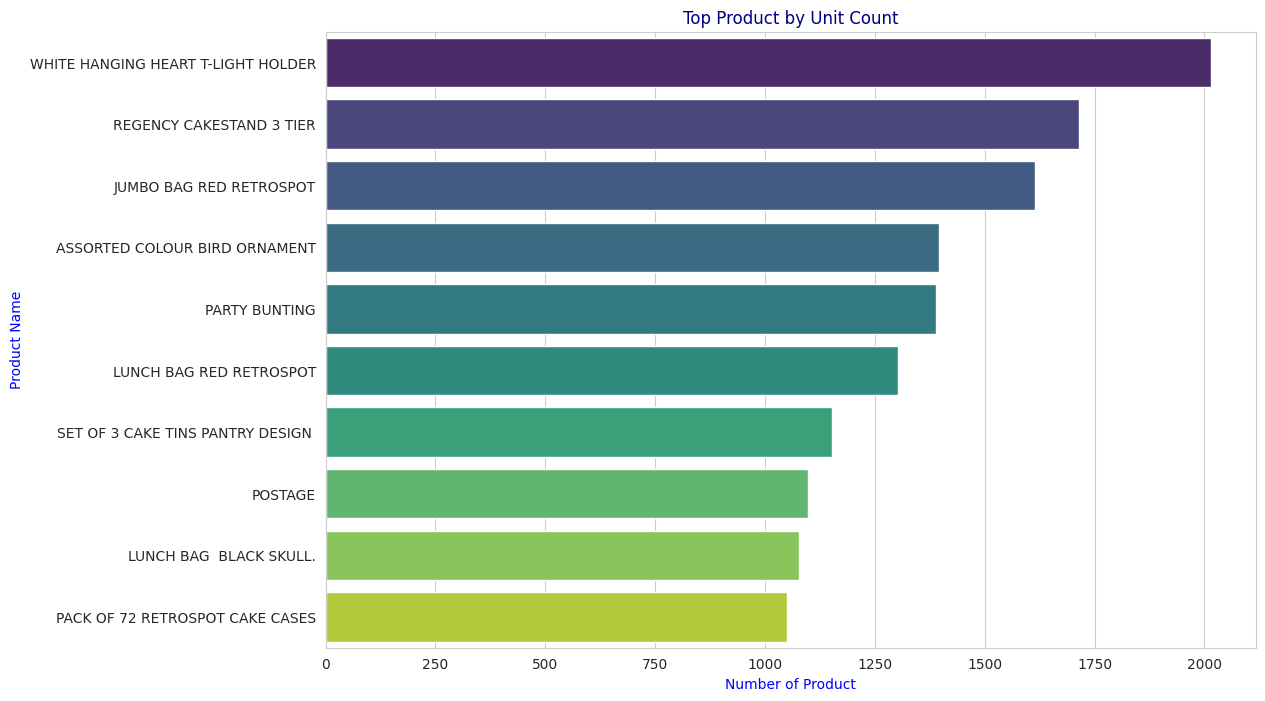

In [ ]:
# Chart - 2 visualization code
description = df['Description'].value_counts().reset_index()
description_df = description.head(10)
print(description_df)

plt.figure(figsize=(12,8))   # Graph size

sns.set_style("whitegrid")  # Style of Graph

sns.barplot(data = description_df, x = 'count', y = 'Description',palette = 'viridis')
# Title of Graph
plt.title("Top Product by Unit Count", color='navy')
# Label of Graph
plt.xlabel("Number of Product",color='blue')
plt.ylabel("Product Name", color='blue')
# Showing Grpah
plt.show()


##### 1. Why did you pick the specific chart?

 The best tool for displaying comparisons between several categories of data. Horizontal rectangles leave enough room for textual information and are therefore ideal for long data labels.

##### 2. What is/are the insight(s) found from the chart?

* This graph reveals our best-selling product.

#### Chart - 3
### Top 10 Best Selling products.


                          Description  TotalAmount
0         PAPER CRAFT , LITTLE BIRDIE    168469.60
1            REGENCY CAKESTAND 3 TIER    142264.75
2  WHITE HANGING HEART T-LIGHT HOLDER    100392.10
3             JUMBO BAG RED RETROSPOT     85040.54
4      MEDIUM CERAMIC TOP STORAGE JAR     81416.73
5                             POSTAGE     77803.96
6                       PARTY BUNTING     68785.23
7       ASSORTED COLOUR BIRD ORNAMENT     56413.03
8                              Manual     53419.93
9                  RABBIT NIGHT LIGHT     51251.24


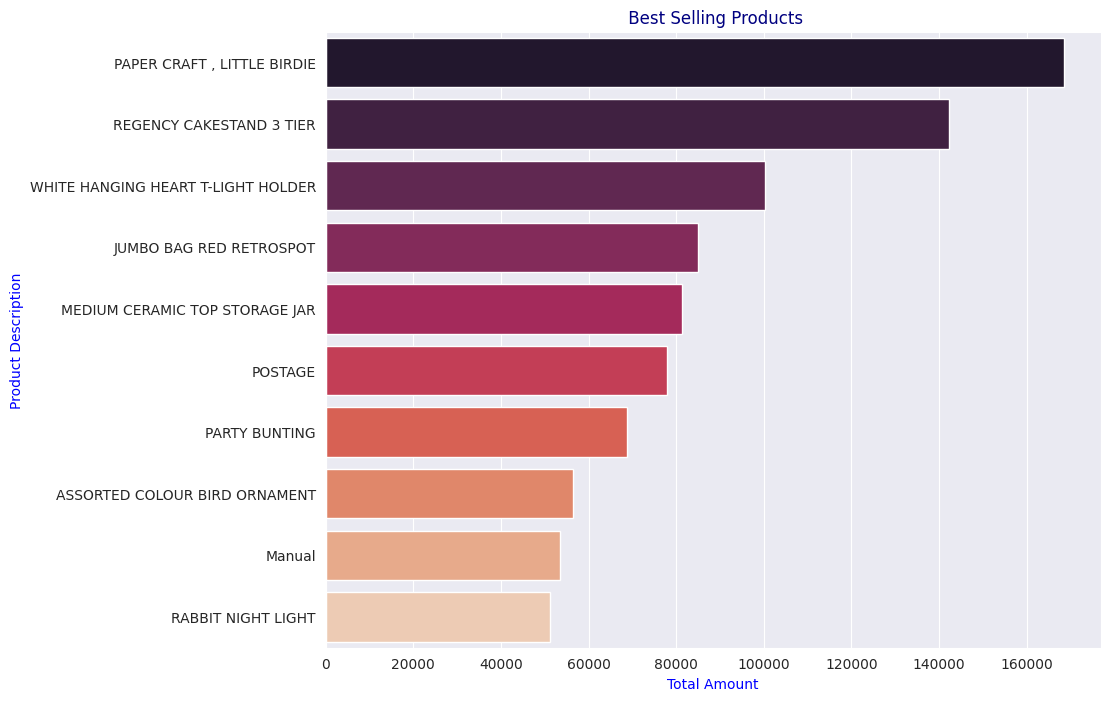

In [ ]:
# Chart - 3 visualization code
top_product = df.groupby(['Description'])['TotalAmount'].sum().sort_values(ascending=False).reset_index().head(10)
print(top_product)

plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

sns.barplot(x = 'TotalAmount', y= 'Description',data = top_product, palette="rocket")
# Graph title
plt.title(" Best Selling Products", color='navy')
# Graph lebel
plt.xlabel("Total Amount", color='blue')
plt.ylabel("Product Description", color='blue')

plt.show()

##### 2. What is/are the insight(s) found from the chart?



*  This visualization shows which product generated the highest sales revenue.
*   Interestingly, while the graph shows "WHITE HANGING HEART T-LIGHT HOLDER" as the top seller in terms of units sold, " PAPER CRAFT , LITTLE BIRDIE " generated the highest total sales revenue.



#### Chart - 4
### Top 10 Customers with Most Frequent Purchases

   CustomerID  count
0     17841.0   7676
1     14911.0   5672
2     14096.0   5111
3     12748.0   4413
4     14606.0   2677
5     15311.0   2366
6     14646.0   2080
7     13089.0   1814
8     13263.0   1667
9     14298.0   1637


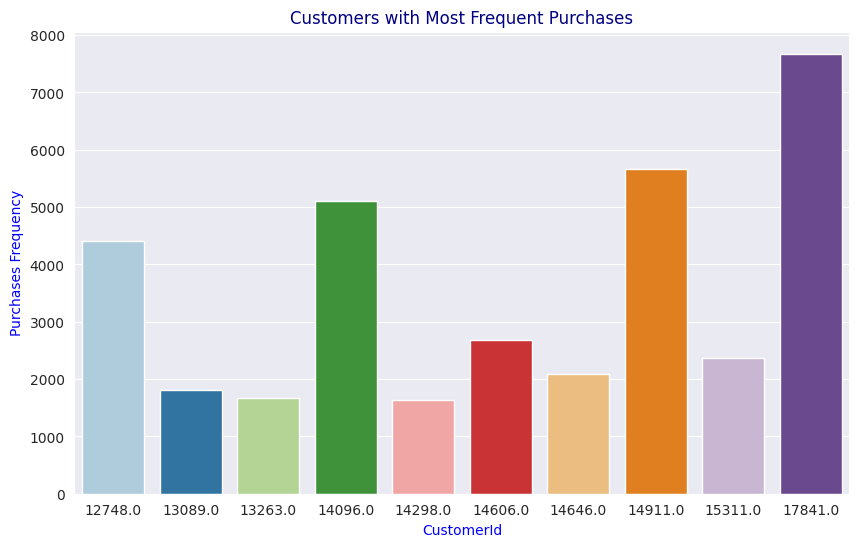

In [ ]:
# Chart - 4 visualization code
customer_purchases_frequent = df['CustomerID'].value_counts().sort_values(ascending= False).reset_index()
top_frequent_purchaser_df = customer_purchases_frequent.head(10)
print(top_frequent_purchaser_df)

plt.figure(figsize=(10,6))  # Graph size
sns.set_style("darkgrid")   # Graph style

sns.barplot(x= 'CustomerID', y= 'count', palette= "Paired", data= top_frequent_purchaser_df)

# Setting graph title and labels
plt.title("Customers with Most Frequent Purchases",color='navy')
plt.xlabel("CustomerId", color='blue')
plt.ylabel("Purchases Frequency",color='blue')
# Showing the graph
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* The top customers in terms of purchase frequency are revealed in this graph.
* We can likewise says that they are most faithful clients.

#### Chart - 5
### Top 5 Countries with the Most Potential Customers

          Country   count
0  United Kingdom  349227
1         Germany    9027
2          France    8327
3            EIRE    7228
4           Spain    2480


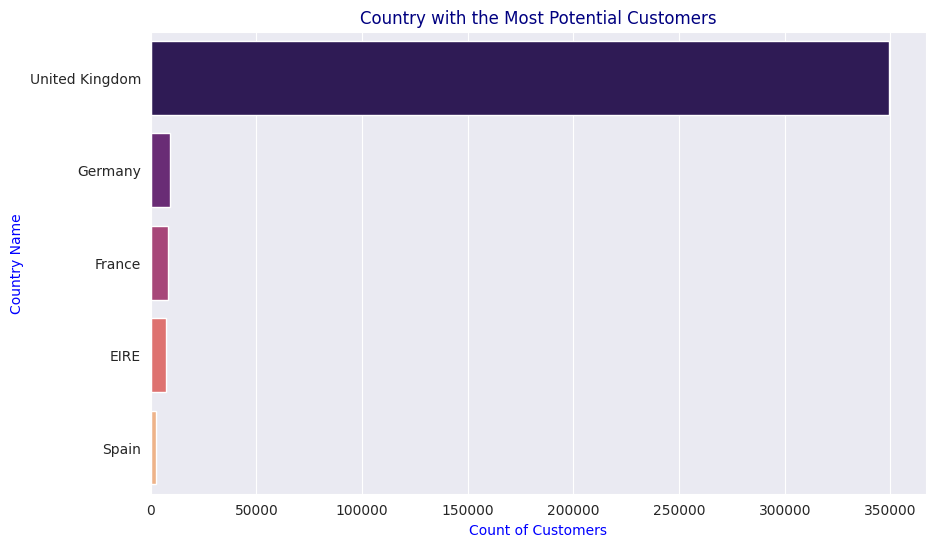

In [ ]:
# Chart - 5 visualization code
country_customer_count = df['Country'].value_counts().sort_values(ascending=False).reset_index()
country_customer_count_df = country_customer_count.head(5)
print(country_customer_count_df)

plt.figure(figsize=(10,6))

sns.barplot(x = 'count', y='Country',data = country_customer_count_df, palette='magma')
# setting title and labels of Graph.
plt.title("Country with the Most Potential Customers",color='navy')
plt.xlabel("Count of Customers",color='blue')
plt.ylabel("Country Name",color='blue')
# showing graph
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* The largest number of customers are from the UK, followed by Germany and France.

#### Chart - 6
### Country with the Highest Customer Expenditure.

          Country  TotalAmount
0  United Kingdom  7285024.644
1     Netherlands   285446.340
2            EIRE   265262.460
3         Germany   228678.400
4          France   208934.310


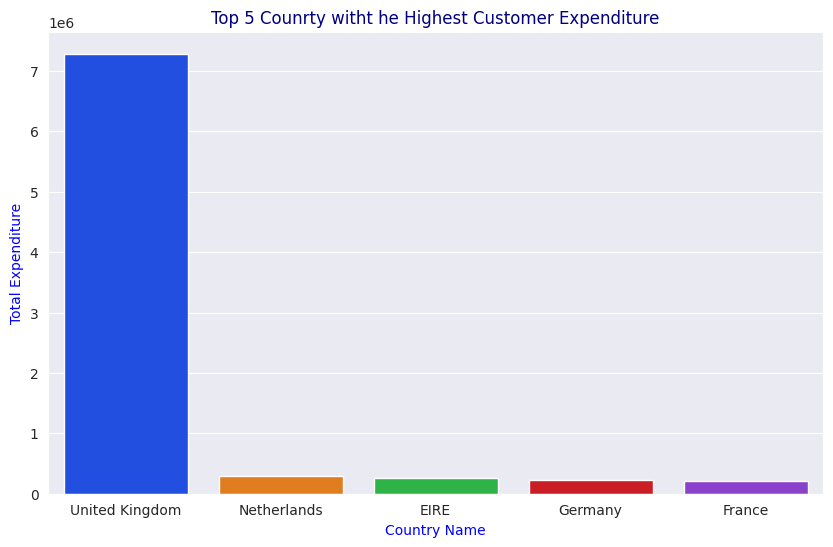

In [ ]:
# Chart - 6 visualization code
country_expenditure_df = df.groupby(['Country'])['TotalAmount'].sum().sort_values(ascending=False).reset_index().head()
print(country_expenditure_df)

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.barplot(x = 'Country', y='TotalAmount',data = country_expenditure_df, palette='bright')
# setting title and labels of Graph.
plt.title("Top 5 Counrty witht he Highest Customer Expenditure",color='navy')
plt.xlabel("Country Name",color='blue')
plt.ylabel("Total Expenditure",color='blue')
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   The top spending customers are primarily from the UK, followed by those from the Netherlands and EIRE.




#### Chart - 7
### Monthly Trend in Total Spending

        Month  TotalAmount
0       April   468374.331
1      August   644051.040
2    December  1087613.170
3    February   446084.920
4     January   568101.310
5        July   598962.901
6        June   660046.050
7       March   594081.760
8         May   677355.150
9    November  1156205.610
10    October  1035642.450
11  September   950690.202


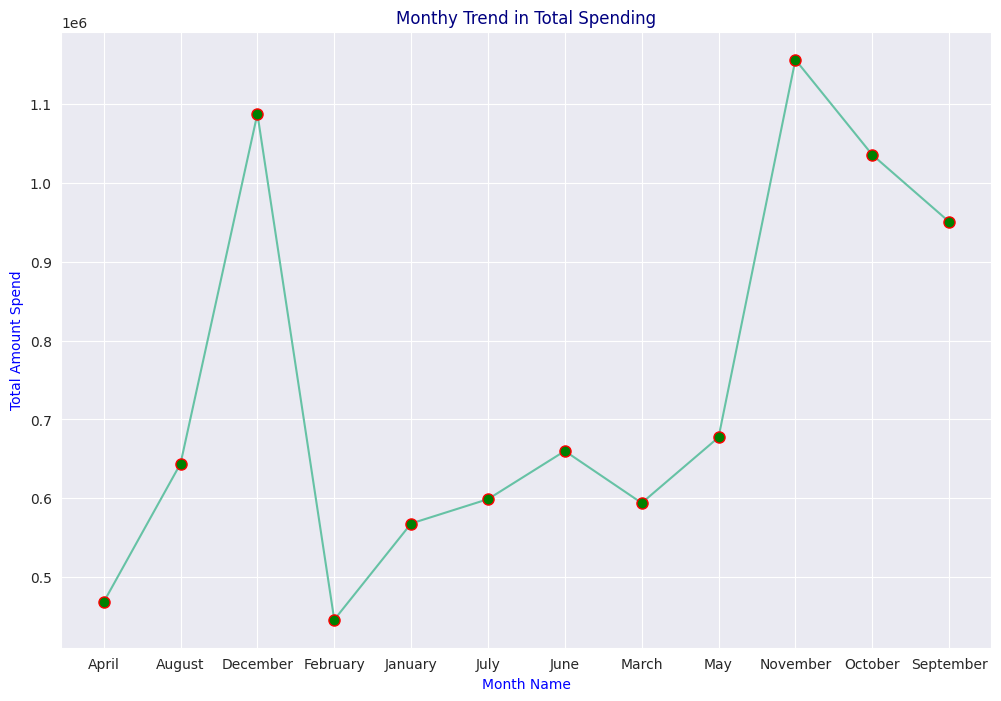

In [ ]:
# Chart - 7 visualization code
monthly_spending = df.groupby(['Month'])['TotalAmount'].sum().reset_index()
print(monthly_spending)

plt.figure(figsize=(12,8))
# Line Plot
plt.plot(monthly_spending['Month'],  monthly_spending['TotalAmount'], marker='o',mec='red',mfc='green',ms=8)
# Graph Title
plt.title("Monthy Trend in Total Spending",color='navy')
# Graph Labels
plt.xlabel("Month Name",color='blue')
plt.ylabel("Total Amount Spend",color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

 Line graphs are excellent for showing trends over time. By plotting Total amount spend against months, you can easily observe how the values change from one month to the next.

##### 2. What is/are the insight(s) found from the chart?



*   Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.
*   Least numbers of purchasing are in the month of April and February.



#### Chart - 8
### Daily Transaction Volume.

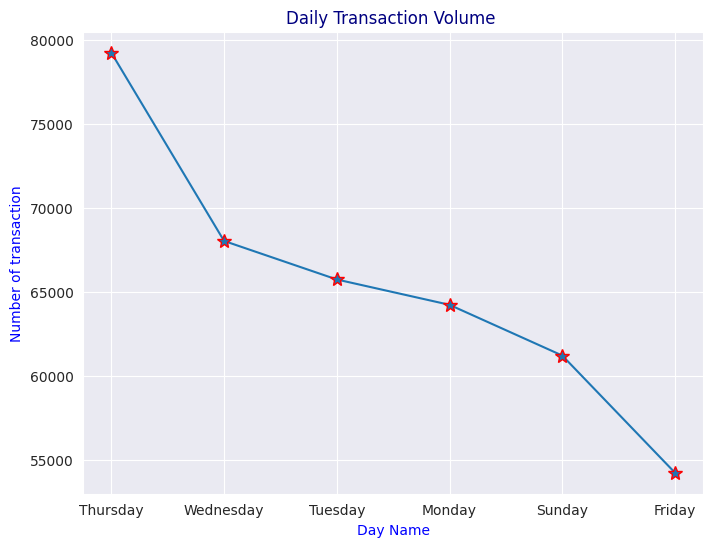

In [ ]:
# Chart - 8 visualization code
day_df = df['Day'].value_counts().reset_index()
day_df

plt.figure(figsize=(8,6))
# Line Plot
plt.plot(day_df['Day'], day_df['count'], marker='*',mec='red',ms=10)
# Graph Title
plt.title("Daily Transaction Volume ",color='navy')
# Graph Labels
plt.xlabel("Day Name",color='blue')
plt.ylabel("Number of transaction",color='blue')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday

#### Chart - 9
### Hourly Transaction Volume

    Hour  TotalAmount
0      6        4.250
1      7    31059.210
2      8   281997.790
3      9   842392.341
4     10  1259267.591
5     11  1101177.600
6     12  1373695.390
7     13  1168724.200
8     14   991992.821
9     15   963559.680
10    16   467380.560
11    17   233811.591
12    18   104744.990
13    19    48568.400
14    20    18832.480


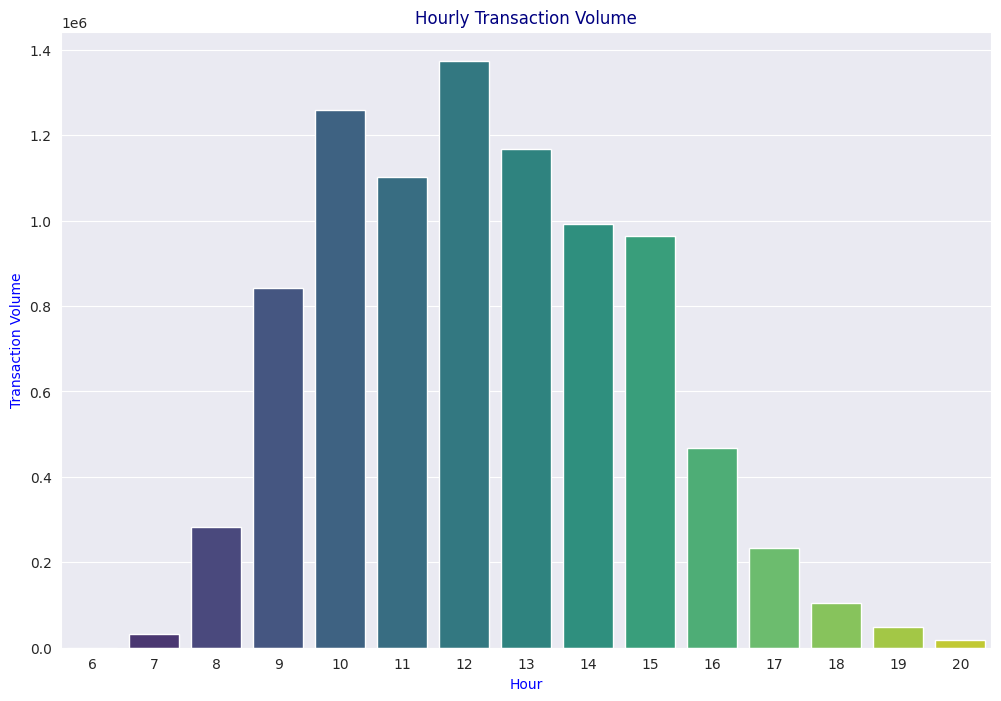

In [ ]:
# Chart - 9 visualization code
hour_df = df.groupby(['Hour'])['TotalAmount'].sum().reset_index()
print(hour_df)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Hour', y = 'TotalAmount', data = hour_df, palette = 'viridis')
# Title of Graph
plt.title("Hourly Transaction Volume",color='navy')
# Labels of Grpah
plt.xlabel("Hour",color='blue')
plt.ylabel("Transaction Volume",color='blue')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.

#### Chart - 14 - Correlation Heatmap

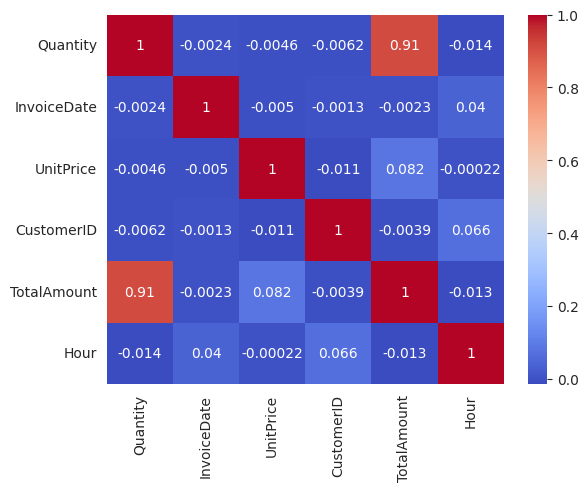

In [ ]:
# Correlation Heatmap visualization code
numeric_df = df[df.describe().columns] # Numeric columns
correlation_matrix = numeric_df.corr()  # Correlation matrix of numeric data

sns.heatmap(correlation_matrix, cmap='coolwarm', annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation coefficients quantify the strength and direction of the linear relationship between two variables. By incorporating correlation values into a heatmap, you can quickly see which variables are positively correlated, negatively correlated or not correlated at all.

Heatmaps visually represent data using color gradients, making it easier to spot patterns and trends.

##### 2. What is/are the insight(s) found from the chart?

There is a strong correlation between quantity and total amount.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average sales between Thursdays and Wednesdays compared to the average sales on all other days of the week combined.

Alternative Hypothesis (H1): There is a significant difference in the average sales between Thursdays and Wednesdays compared to the average sales on all other days of the week combined.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
day_df1 = df[df['Day'].isin(['Wednesday', 'Thursday'])][['TotalAmount']]
day_df2 = df[~df['Day'].isin(['Wednesday', 'Thursday'])][['TotalAmount']]

# applying ttest
t_statistic, p_value = stats.ttest_ind(day_df1, day_df2, equal_var=False)

print(f"t_statistic: {t_statistic}")
print(f"p_value: {p_value}")

# significance level(alpha)
alpha = 0.05

#Analyze the results
if p_value < alpha:
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

t_statistic: [3.00652777]
p_value: [0.00264274]
Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I have perform t-test to obtain P-Value.

##### Why did you choose the specific statistical test?

A t-test is a statistical method well-suited to determining if a significant difference exists between the average sales on Thursdays and Wednesdays compared to the average sales on all other weekdays combined.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average sales between December, November and October compared to the average sales on all other months.

Alternative Hypothesis (H1): There is a significant difference in the average sales between December, November and October compared to the average sales on all other months.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
day_df1 = df[df['Month'].isin(['December', 'November','October'])][['TotalAmount']]
day_df2 = df[~df['Month'].isin(['December', 'November','October'])][['TotalAmount']]

# applying ttest
t_statistic, p_value = stats.ttest_ind(day_df1, day_df2, equal_var=False)

print(f"t_statistic: {t_statistic}")
print(f"p_value: {p_value}")

# significance level(alpha)
alpha = 0.05

#Analyze the results
if p_value < alpha:
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

t_statistic: [-2.00870211]
p_value: [0.04457011]
Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I have perform t-test to obtain P-Value.

##### Why did you choose the specific statistical test?

A t-test is a statistical method well-suited to determining if a significant difference exists between the average sales on December, November and October compared to the average sales on all other months combined.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average quantity purchased per invoice between different customers.

Alternative Hypothesis (H1): There is a significant difference in the average quantity purchased per invoice between different customers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Group by customerId and invoiceid to get average quantity per invoice for each customer
df_grouped = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Quantity': 'mean'}).reset_index()

# Extract necessary columns
customer_quantities = df_grouped[['CustomerID', 'Quantity']]

# Create a list of arrays for each customer's quantities
quantities_per_customer = [group['Quantity'].values for name, group in customer_quantities.groupby('CustomerID')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*quantities_per_customer)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average quantity purchased per invoice between different customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average quantity purchased per invoice between different customers.")

F-statistic: 8.841268665403375
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the average quantity purchased per invoice between different customers.


##### Which statistical test have you done to obtain P-Value?

I have performs a one-way ANOVA to test the null hypothesis that there is significant difference in the average quantity purchased per invoice between different customers.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have dropped the null value.

## ***7. ML Model Implementation***

### ML Model - 1 : Create the RFM model (Recency, Frequency,Monetary value)






In [ ]:
# ML Model - 1 Implementation

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)
#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                       'InvoiceNo': lambda x: len(x),
                                       'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

#### 1. Explain the ML Model used.
RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary – How much do they spend?

Recency - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

Frequency - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

Monetary - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.


In [ ]:
#Descriptive Statistics
rfm_df.describe().T

count         mean          std  min      25%     50%       75%  \
Recency    4339.0    92.041484   100.007757  0.0   17.000   50.00   141.500   
Frequency  4339.0    90.512100   225.515328  1.0   17.000   41.00    98.000   
Monetary   4339.0  2048.215924  8984.248352  0.0  306.455  668.56  1660.315   

                 max  
Recency       373.00  
Frequency    7676.00  
Monetary   280206.02

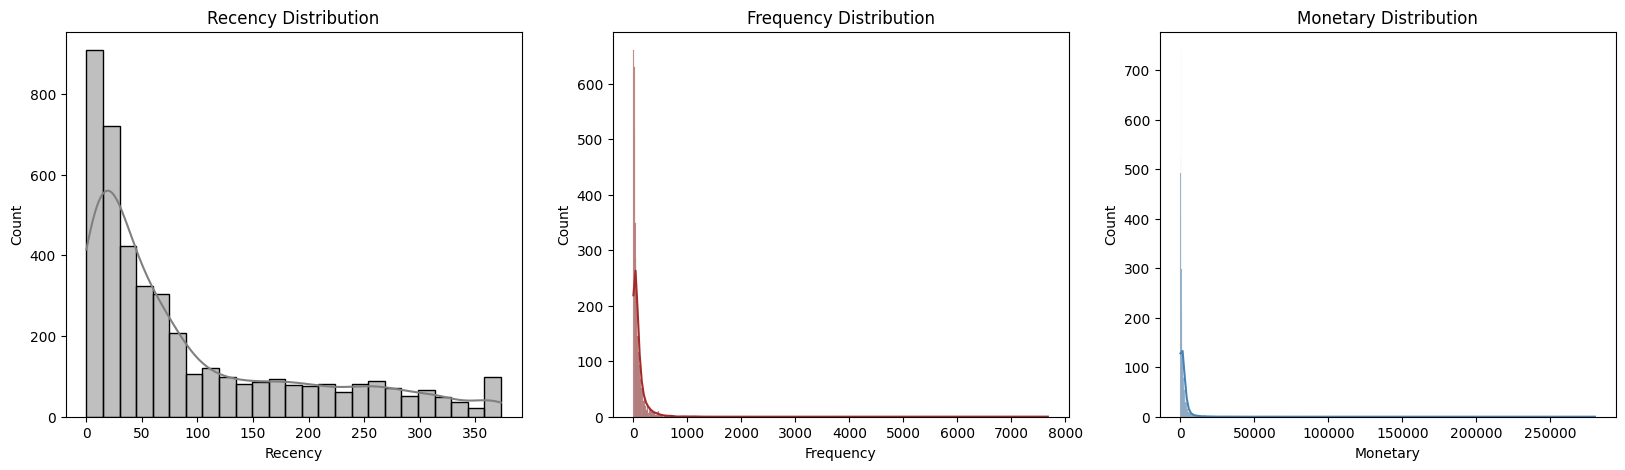

In [ ]:
# Distribution plot
# plots size
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.histplot(rfm_df['Recency'], ax = axes[0],color='gray', kde=True)  # Recency Distribution
axes[0].set_title('Recency Distribution')

sns.histplot(rfm_df['Frequency'], ax = axes[1],color='brown', kde=True)  # Frequency Distribution
axes[1].set_title('Frequency Distribution')

sns.histplot(rfm_df['Monetary'], ax = axes[2],color='steelblue', kde=True)  # Monetary Distribution
axes[2].set_title('Monetary Distribution')

plt.show()  # showing graph

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [ ]:
'''Functions to create R, F and M segments according to quantiles for Recency low score is important and for Frequency and Monetory
maximum is important. So keeping this in mind we are creating two function to create scores. '''
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

Note: Customers with an RFM score of 111 are typically our most engaged customers, while those with a score of 444 are at risk of churn.

In [ ]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

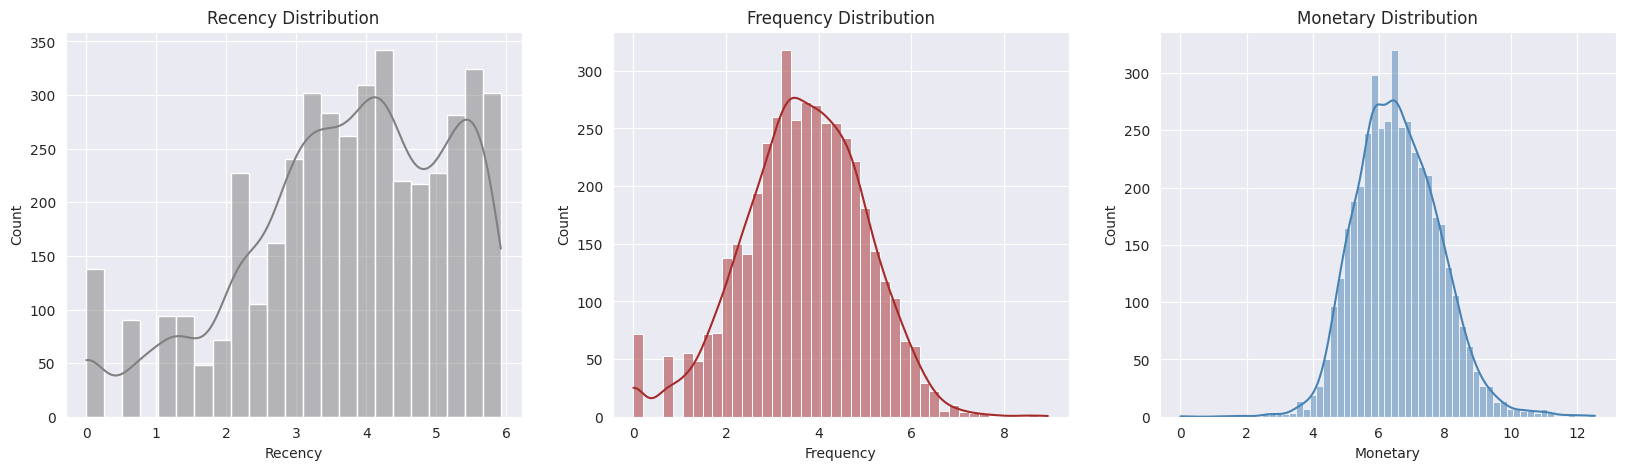

In [ ]:
# Data Distribution after log transformation
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.histplot(Log_Tfd_Data['Recency'], ax = axes[0],color='gray', kde=True)  # Recency Distribution
axes[0].set_title('Recency Distribution')

sns.histplot(Log_Tfd_Data['Frequency'], ax = axes[1],color='brown', kde=True)  # Frequency Distribution
axes[1].set_title('Frequency Distribution')

sns.histplot(Log_Tfd_Data['Monetary'], ax = axes[2],color='steelblue', kde=True)  # Monetary Distribution
axes[2].set_title('Monetary Distribution')

plt.show()

In [ ]:
# Log Transform our Recency, Frequency and Monetary column and store it in new features.
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

### ML Model - 2: K Means Clustering
Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.

KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method can be used. These methods will help in selection of the optimum number of clusters.

#### Silhouette score method:
Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

## Applying Silhouette Score Method on Recency and Monetary

In [ ]:
#silhoutte score
features_rec_mon = ['Recency_log','Monetary_log']
X_features_rec_mon = rfm_df[features_rec_mon].values

scaler_rec_mon = StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)   # scaling our features
X_rm = X_rec_mon

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]     # different number of cluster
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)       # passing different number of cluster
    preds = clusterer.fit_predict(X_rm)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_rm, preds)             # calculating silhouette score
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))  # printing number of cluster and silhouette score


For n_clusters = 2, silhouette score is 0.4205409851253143
For n_clusters = 3, silhouette score is 0.3443473922003157
For n_clusters = 4, silhouette score is 0.3647331611070875
For n_clusters = 5, silhouette score is 0.34400316012643956
For n_clusters = 6, silhouette score is 0.34373314926704696
For n_clusters = 7, silhouette score is 0.3422244115884398
For n_clusters = 8, silhouette score is 0.33877146729263874
For n_clusters = 9, silhouette score is 0.3457393862904349
For n_clusters = 10, silhouette score is 0.3466357666484763
For n_clusters = 11, silhouette score is 0.3357656077054737
For n_clusters = 12, silhouette score is 0.3372592150561216
For n_clusters = 13, silhouette score is 0.34152640823782693
For n_clusters = 14, silhouette score is 0.34192317040000675
For n_clusters = 15, silhouette score is 0.3451017326587141


## Applying Elbow Method on Recency and Monetary:
Elbow Method:

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

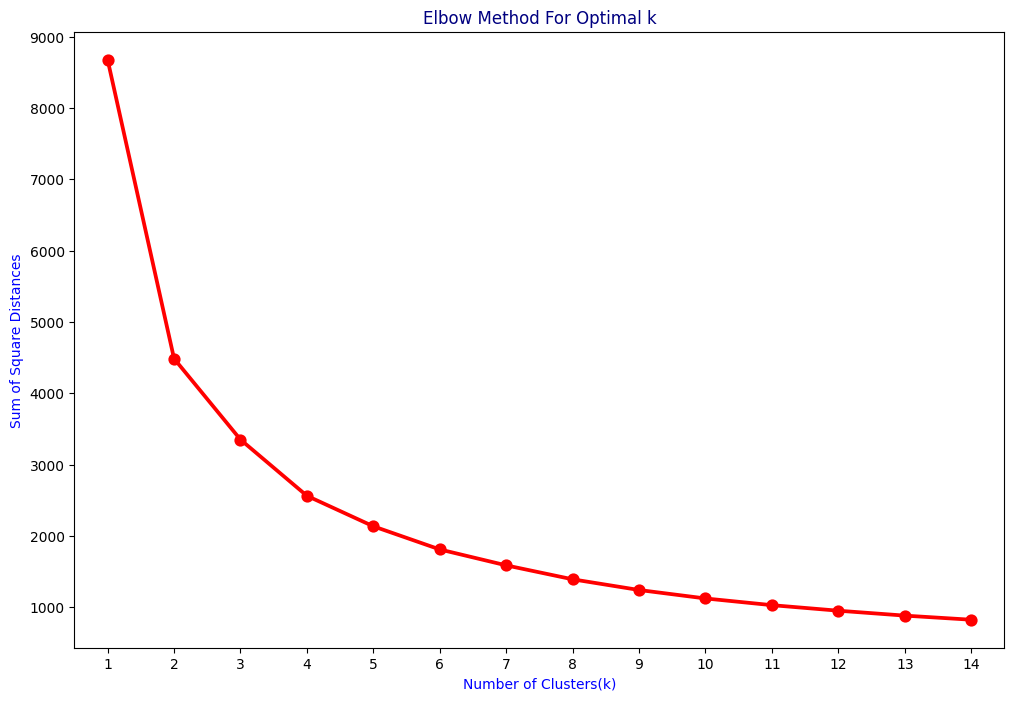

In [ ]:
#applying elbow method

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_rm)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)',color='blue')
plt.ylabel('Sum of Square Distances', color= 'blue')
plt.title('Elbow Method For Optimal k', color = 'navy')
plt.show()

## Both the silhouette score and the elbow method suggest that a 2-cluster solution may be optimal for this data.


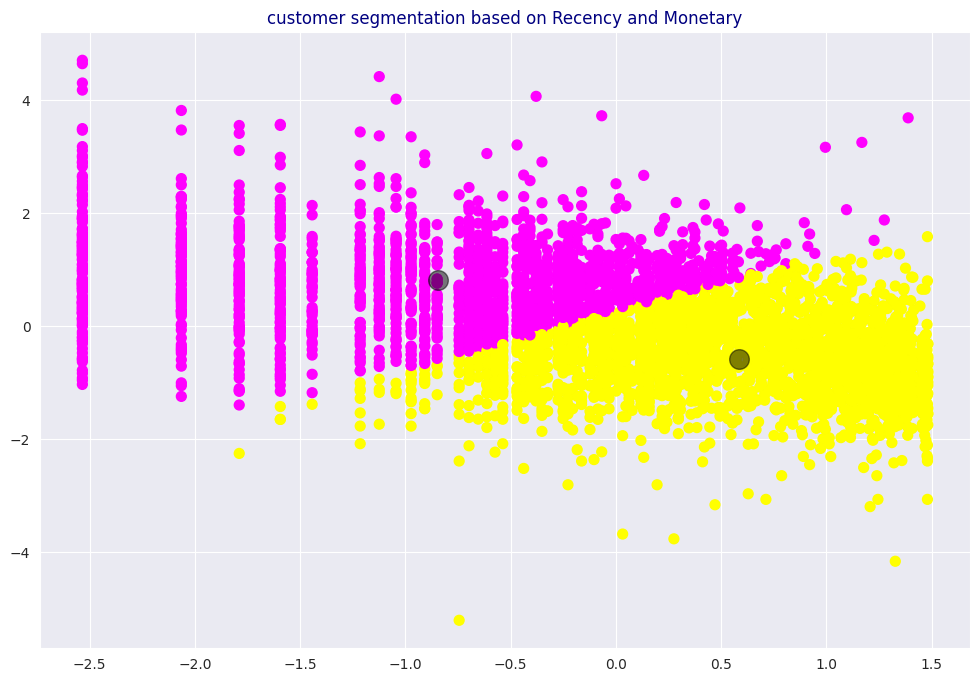

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_rm)
y_kmeans= kmeans.predict(X_rm)
# vizualize two cluster
plt.figure(figsize=(12,8))  # figure size
plt.title('customer segmentation based on Recency and Monetary',color='navy')
plt.scatter(X_rm[:, 0], X_rm[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Applying silhouette Score Method on Frquency and Monetary

In [ ]:
#silhouetee score
features_fre_mon = ['Frequency_log','Monetary_log']
X_features_fre_mon = rfm_df[features_fre_mon].values

scaler_fre_mon = StandardScaler()
X_fre_mon = scaler_fre_mon.fit_transform(X_features_fre_mon)
X_fm = X_fre_mon

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_fm)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_fm, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4784219914021605
For n_clusters = 3, silhouette score is 0.40772986590660476
For n_clusters = 4, silhouette score is 0.3715254067544314
For n_clusters = 5, silhouette score is 0.3474079293266336
For n_clusters = 6, silhouette score is 0.3619959504900922
For n_clusters = 7, silhouette score is 0.3448691034847607
For n_clusters = 8, silhouette score is 0.35322301636177816
For n_clusters = 9, silhouette score is 0.3462615081745415
For n_clusters = 10, silhouette score is 0.35778083314495124
For n_clusters = 11, silhouette score is 0.3668842140097474
For n_clusters = 12, silhouette score is 0.3556158663500068
For n_clusters = 13, silhouette score is 0.3633892639541116
For n_clusters = 14, silhouette score is 0.3578770516160799
For n_clusters = 15, silhouette score is 0.36048531397304867


## Applying Elbow Method on Frequency and Monetary

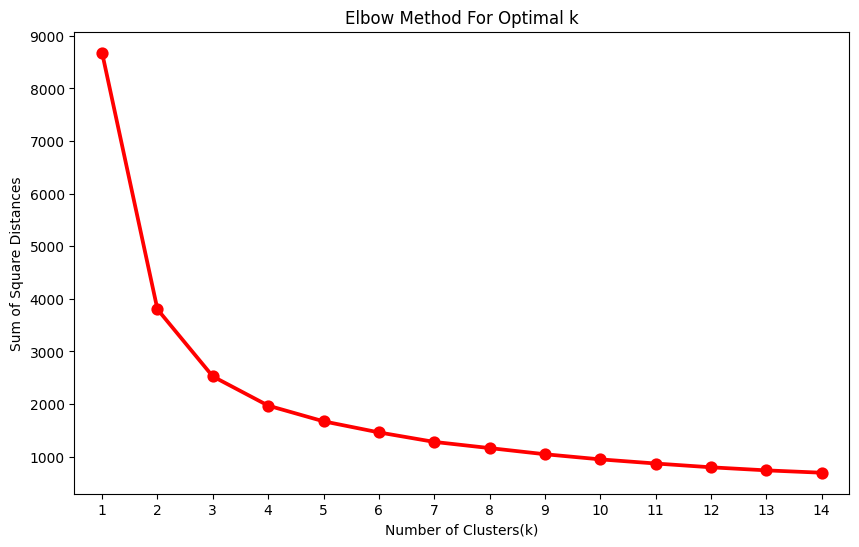

In [ ]:
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_fm)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(10,6))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

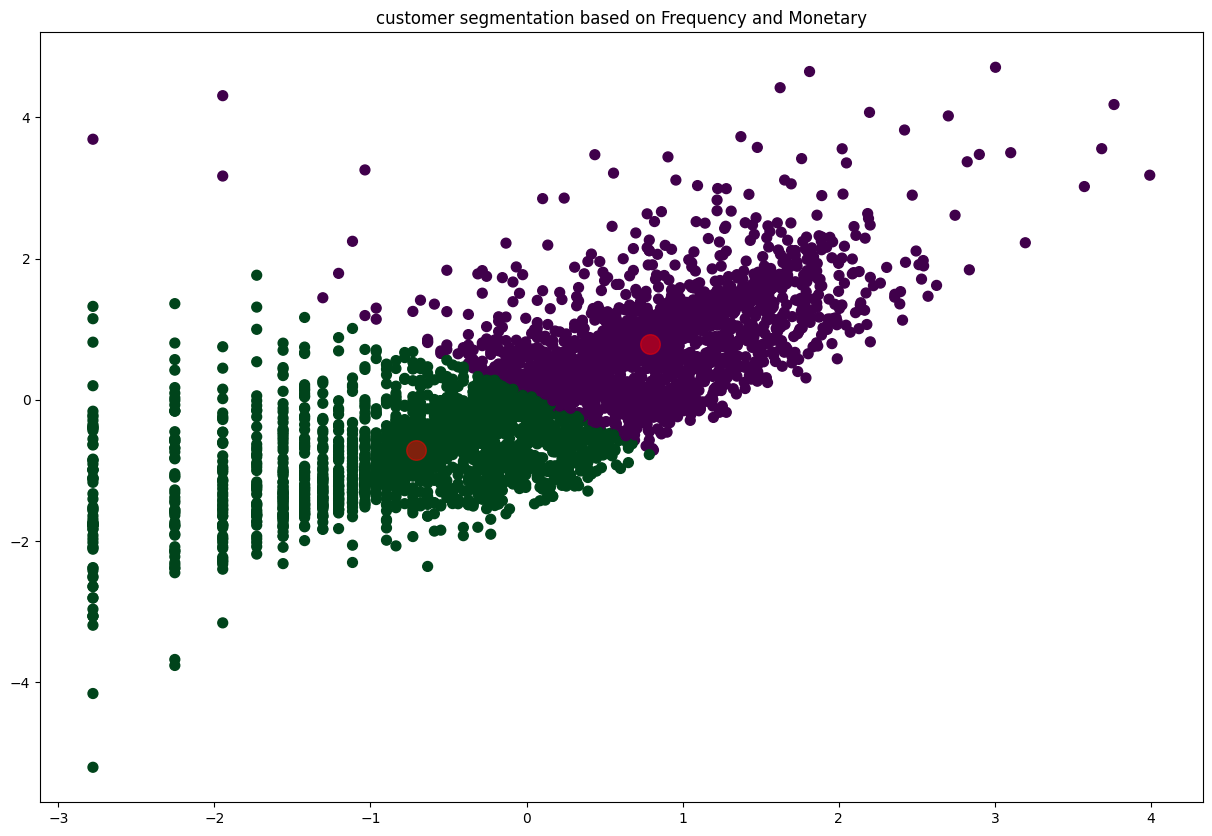

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_fm)
y_kmeans= kmeans.predict(X_fm)

#plotting graph based on frequency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X_fm[:, 0], X_fm[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## Applying Silhouette Method on Recency, Frequency and Monetary.

In [ ]:
#scaling features
feature_vector = ['Recency_log','Frequency_log','Monetary_log']
X_features = rfm_df[feature_vector].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)


For n_clusters = 2 The average silhouette_score is : 0.395588261083924
For n_clusters = 3 The average silhouette_score is : 0.3056346992700891
For n_clusters = 4 The average silhouette_score is : 0.30270317426951315
For n_clusters = 5 The average silhouette_score is : 0.2792460561657022
For n_clusters = 6 The average silhouette_score is : 0.27920490924462127
For n_clusters = 7 The average silhouette_score is : 0.26639589282641335
For n_clusters = 8 The average silhouette_score is : 0.26439181568270587
For n_clusters = 9 The average silhouette_score is : 0.2530950678302339
For n_clusters = 10 The average silhouette_score is : 0.2523587969335804


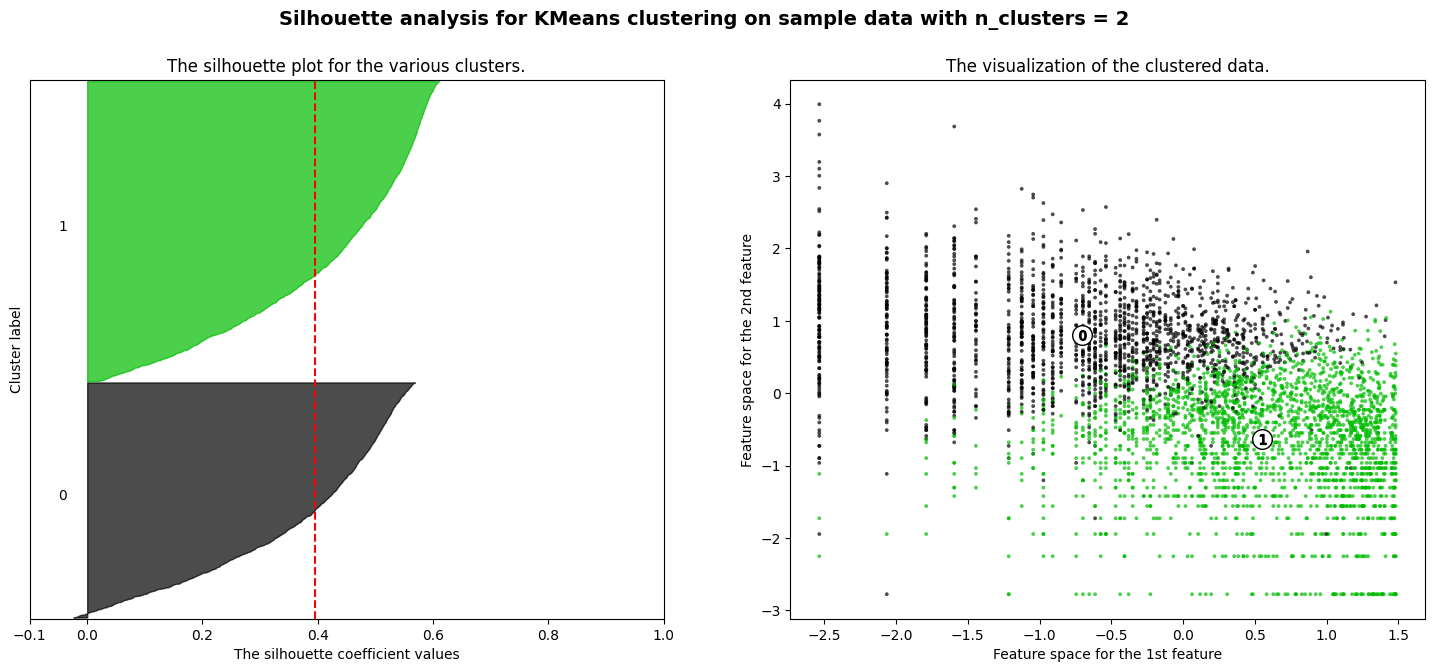

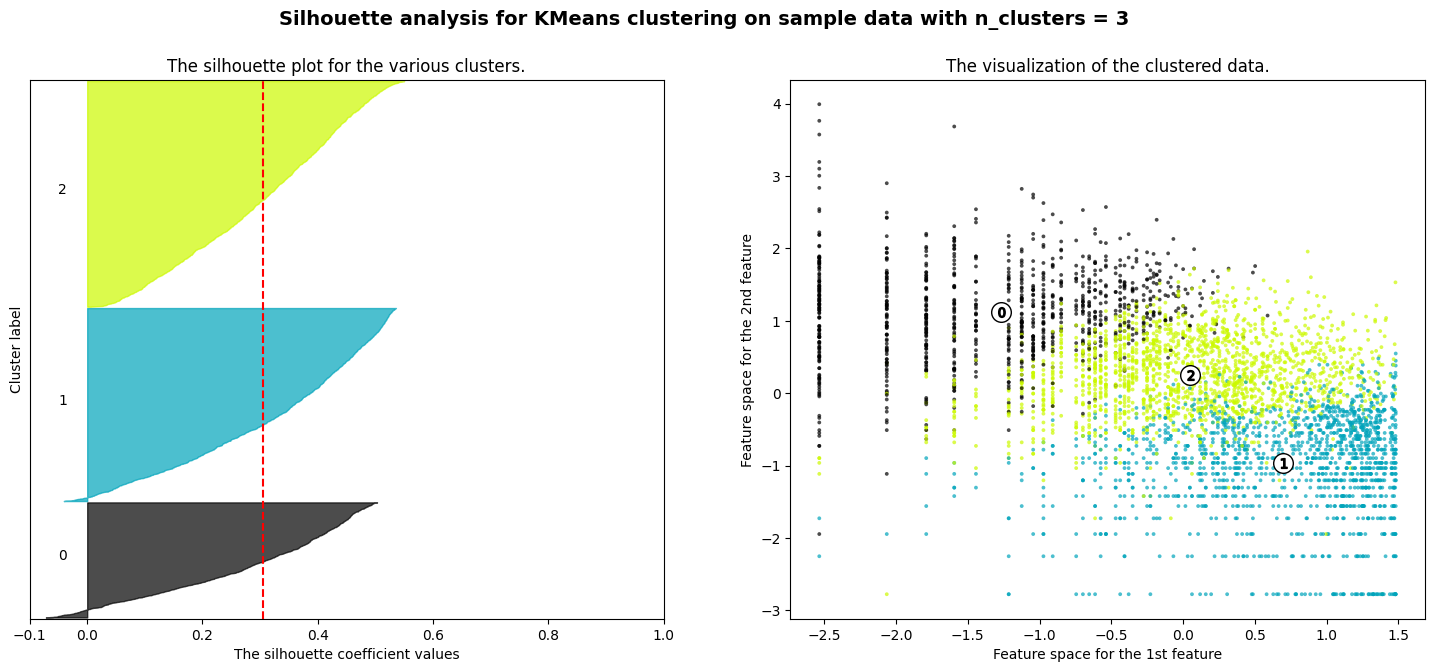

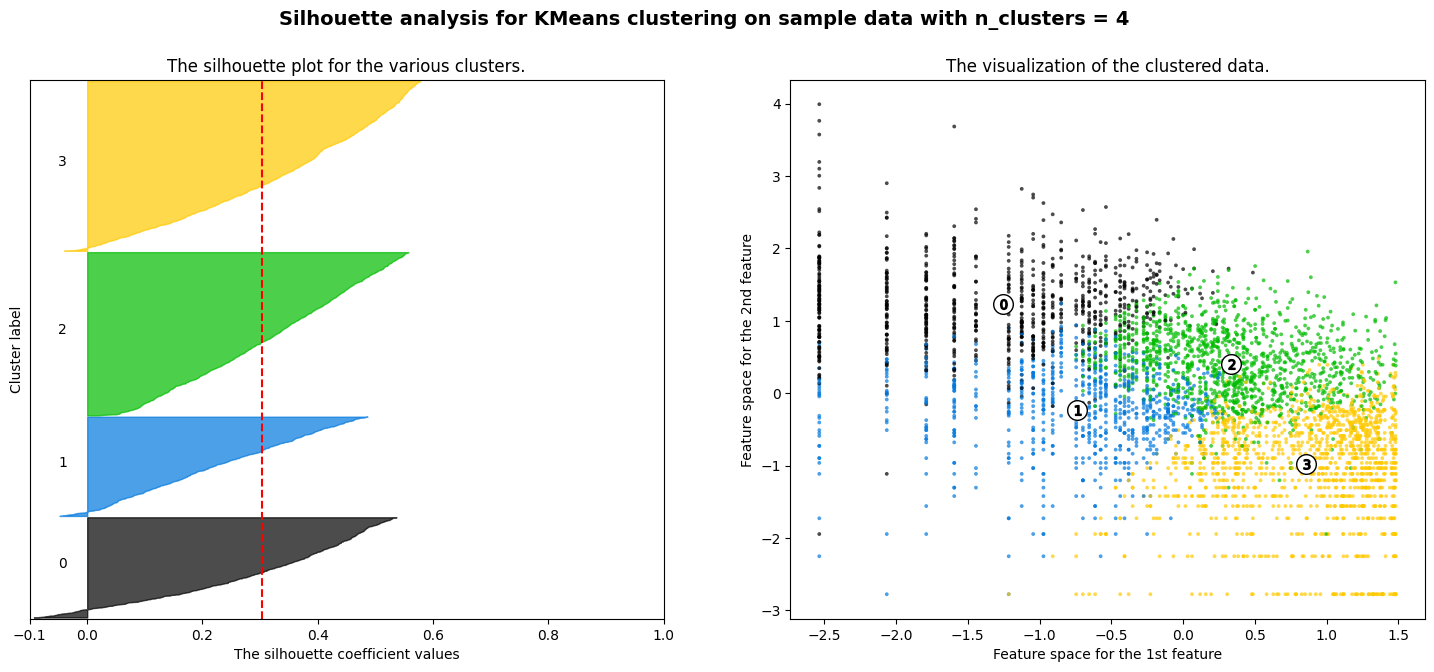

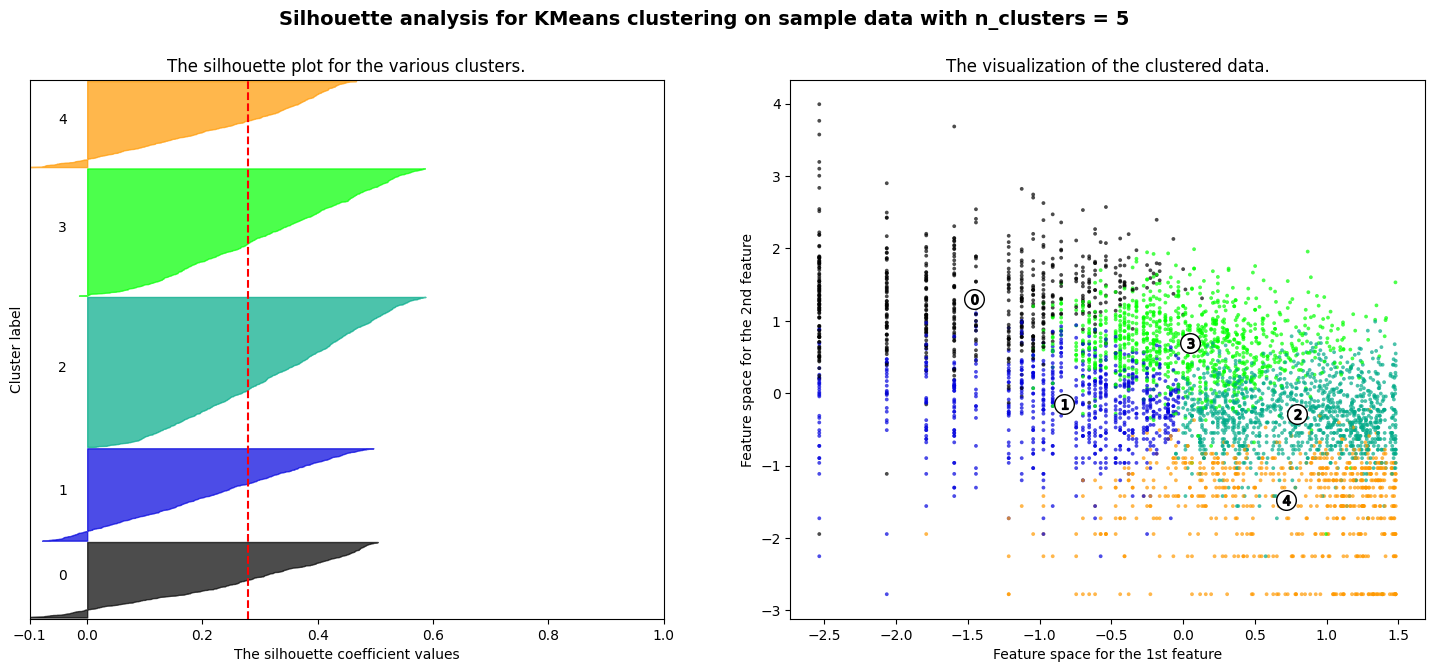

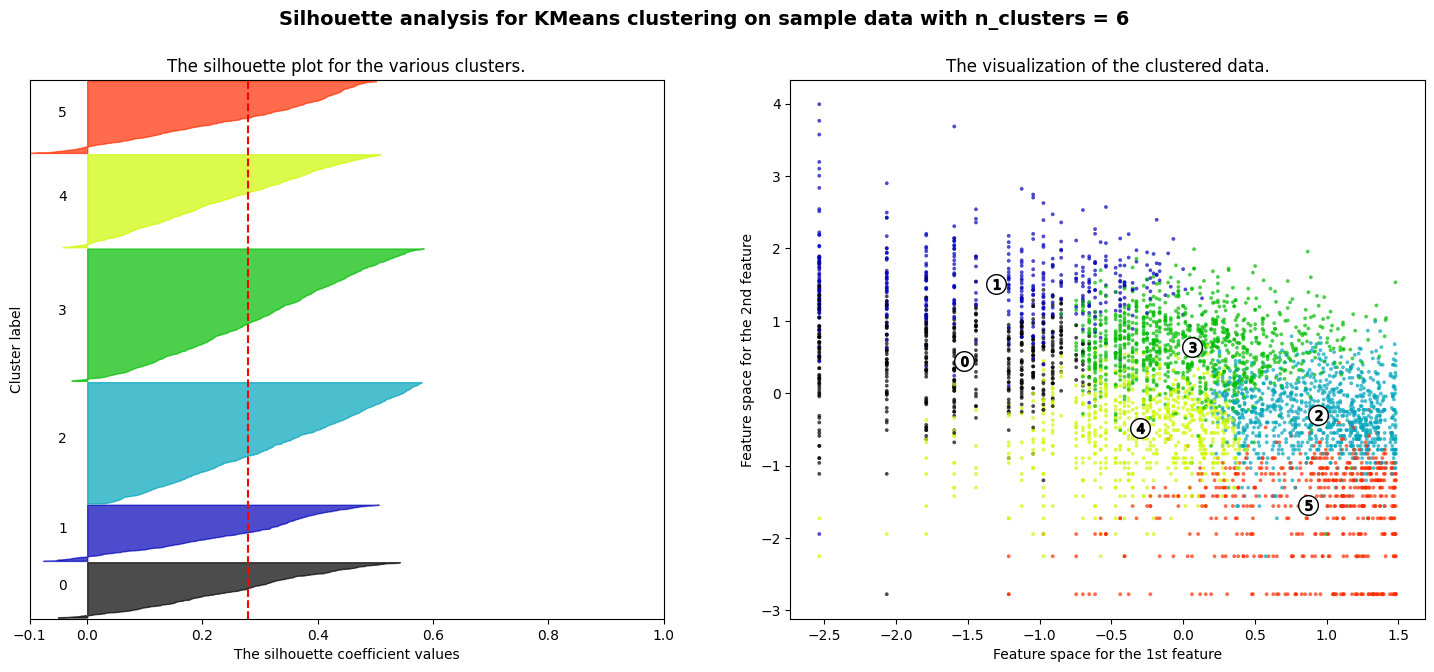

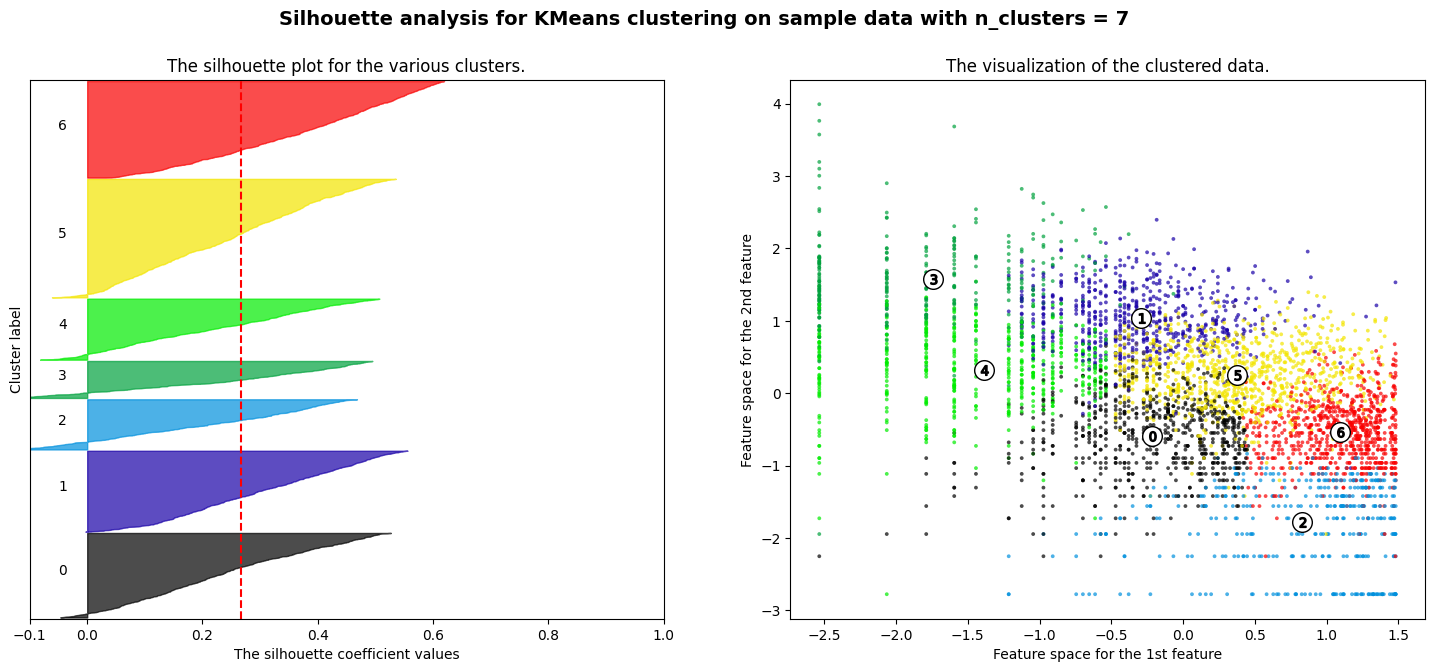

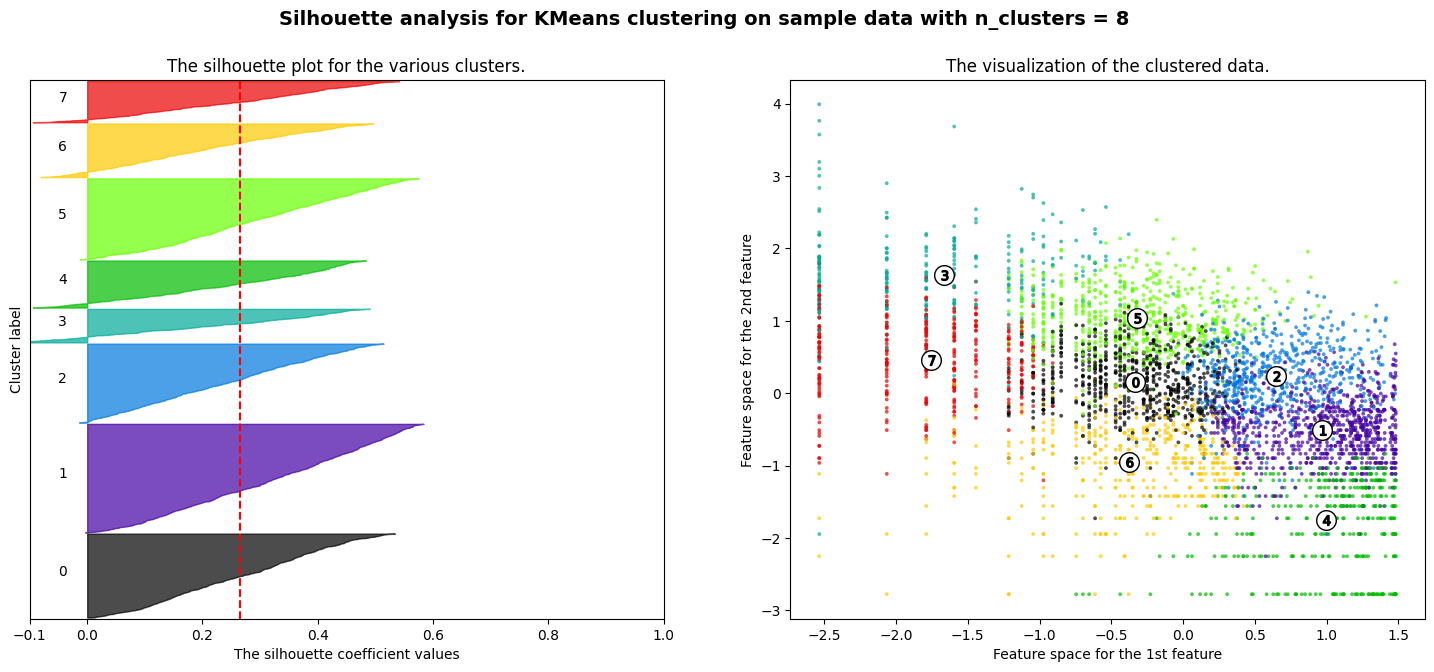

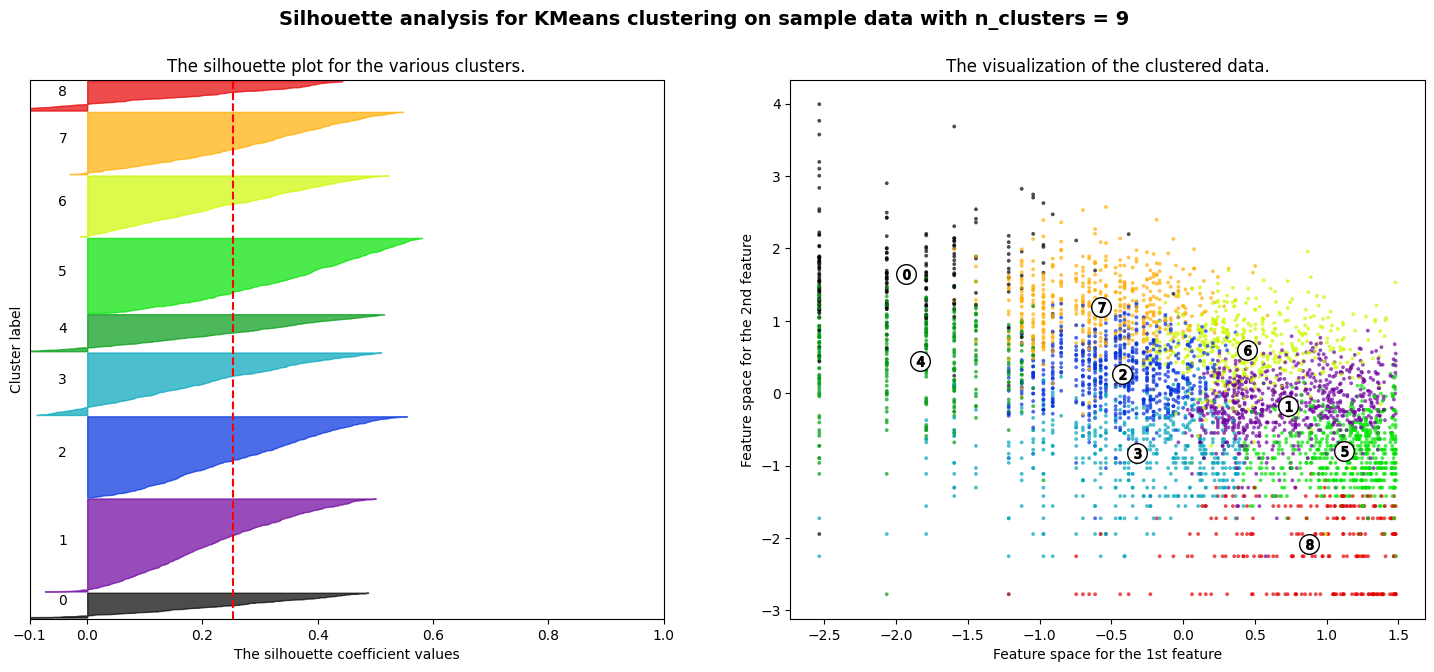

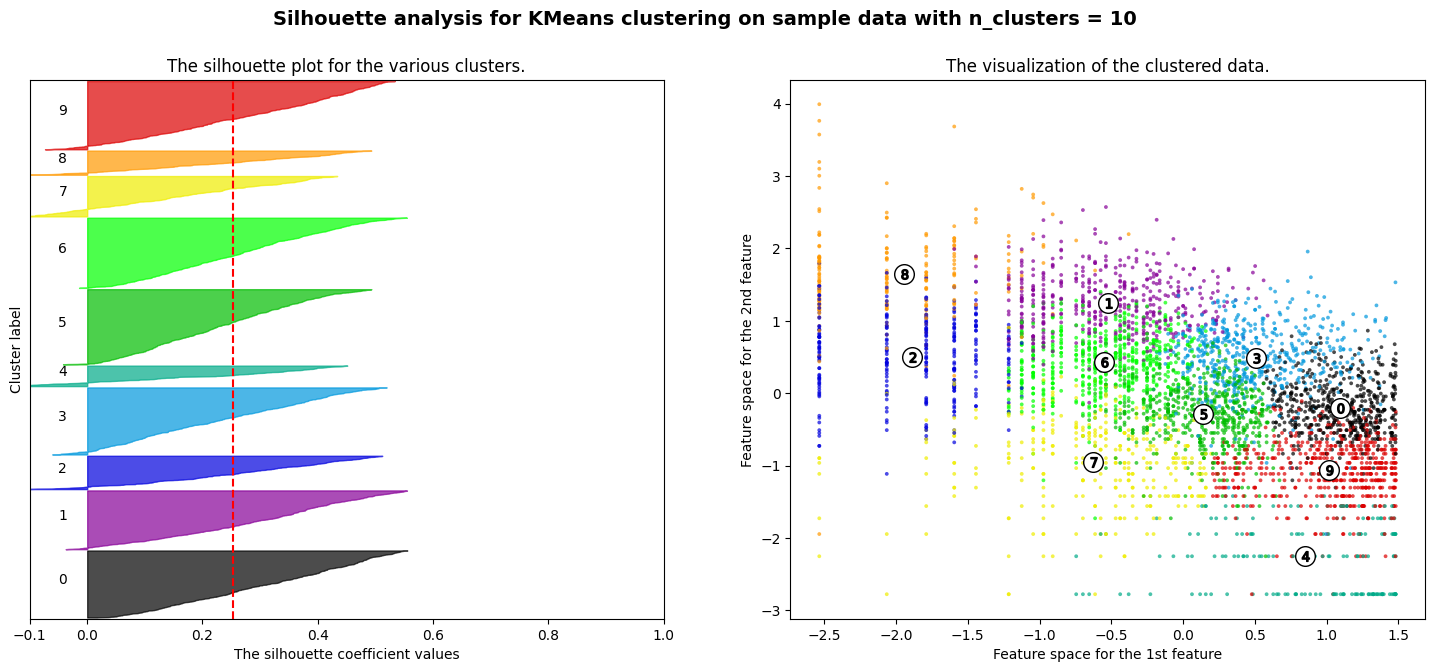

In [ ]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

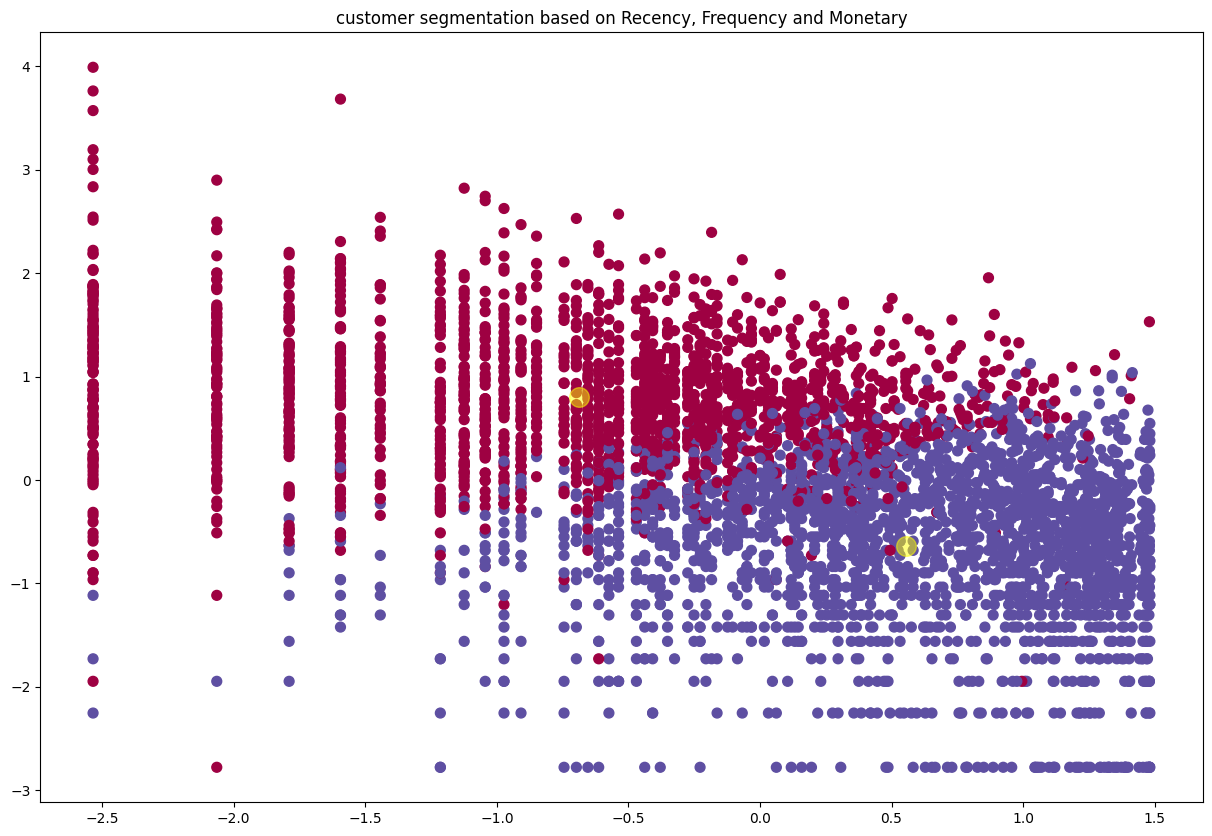

In [ ]:
# KMeans with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

#plotting figure
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

## Applying Elbow Method on Recency, Frequency and Monetary.

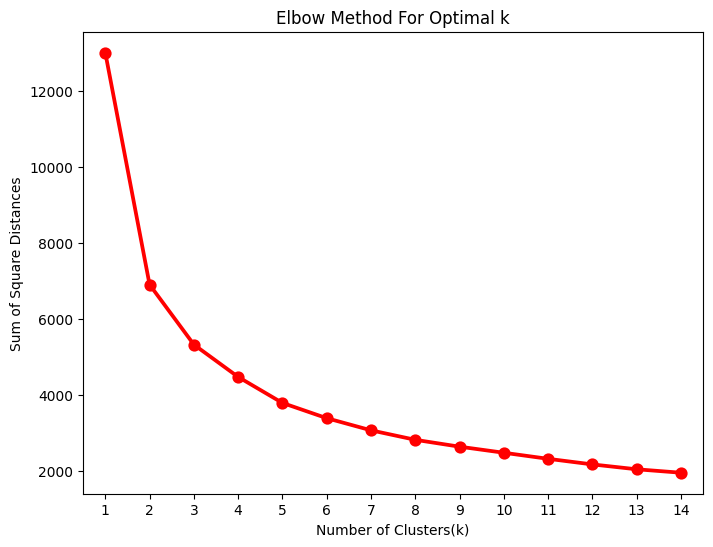

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(8,6))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Unsupervised learning helps us group customers with similar traits for targeted marketing campaigns. To find the best groups, I used silhouette and elbow methods, which are like tools to check how well data points are grouped together. In both cases, the results suggested two groups as the best fit.


In unsupervised learning, particularly with K-Means clustering, determining the optimal number of clusters is essential. The elbow and silhouette methods are instrumental in identifying this "sweet spot" for the number of clusters.

### ML Model - 3: DBSCAN
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.

## Applying DBSCAN on Recency and Monetary

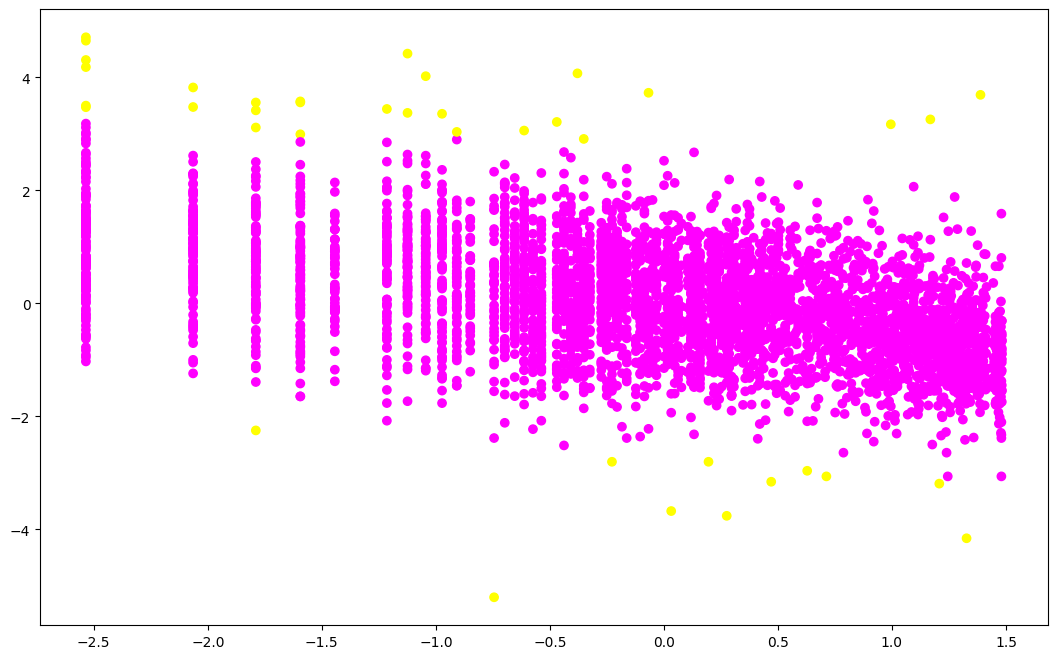

In [ ]:
# ML Model - 3 Implementation
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X_rm)
plt.figure(figsize=(13,8))
plt.scatter(X_rm[:,0], X_rm[:,1], c=y_pred,cmap='spring_r')

## Applying DBSCAN Method on Frquency and Monetary.

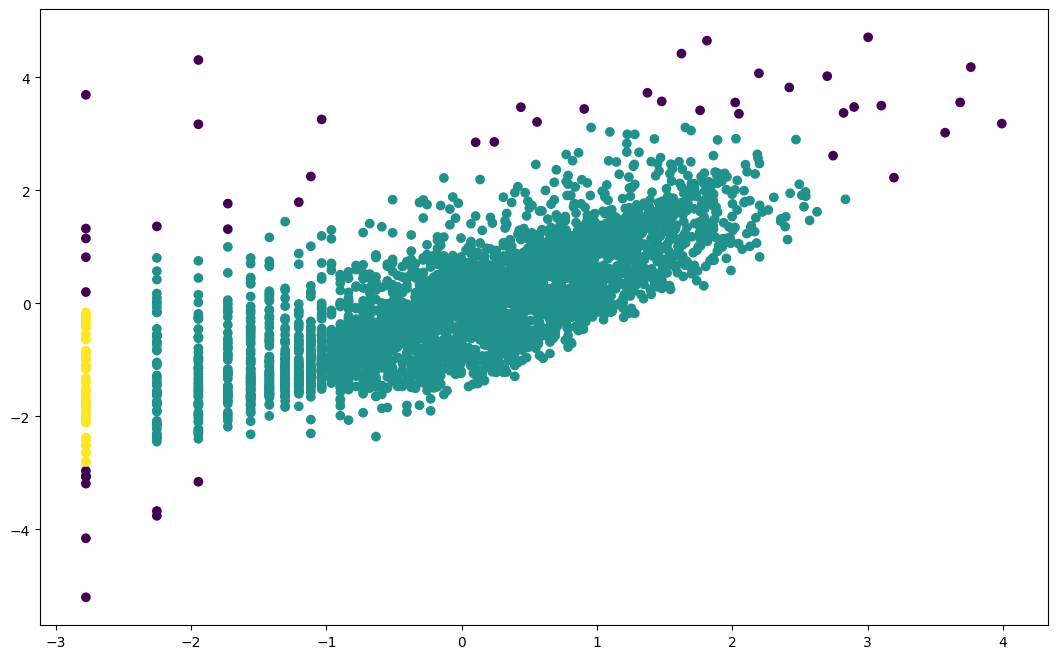

In [ ]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X_fm)
plt.figure(figsize=(13,8))
plt.scatter(X_fm[:,0], X_fm[:,1], c=y_pred)

## Applying DBSCAN to Recency, Frequency and Monetary.

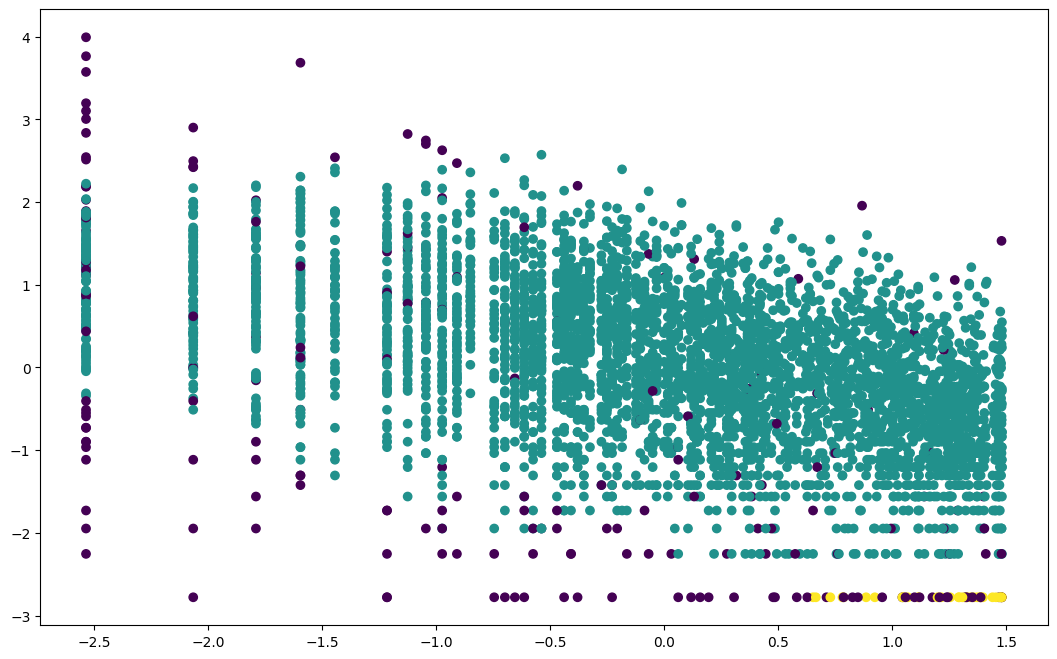

In [ ]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### 3. Explain the model which you have used.

In [ ]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12347.0        0.693147       5.204007      8.368693        0  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.442651      7.826459        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

In [ ]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})

Recency   Frequency     Monetary
Cluster                                     
0         30.112046  174.372436  4067.338265
1        140.344545   25.123052   473.830948

In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
+--------+--------------------------------+------+--

# **Conclusion**

* This project mainly focused on developing customer segments for a UK
based online store, selling unique all occasion gifts.

* Using a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters and got a silhoutte score of 0.39 for two clusters

* By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.

* The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***